# Úkol - příprava dat, základní statistická analýza

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

Pro tento příklad budeme používat podmnožinu s tohoto souboru.

!!! Vytvořený subset nemusí statisticky odpovídat původnímu souboru

## Sub dataset
- Data  = struktura s vyplněnými daty
- m      = počet řádků = 100
- x’s    = vstupní proměnná / features
- y’s    = výstupní promměná / target
- (x, y) = jeden řádek z training dataset
- x(2)   = (4, 5, 3374, 85)
- y(2)   = 1 050 000

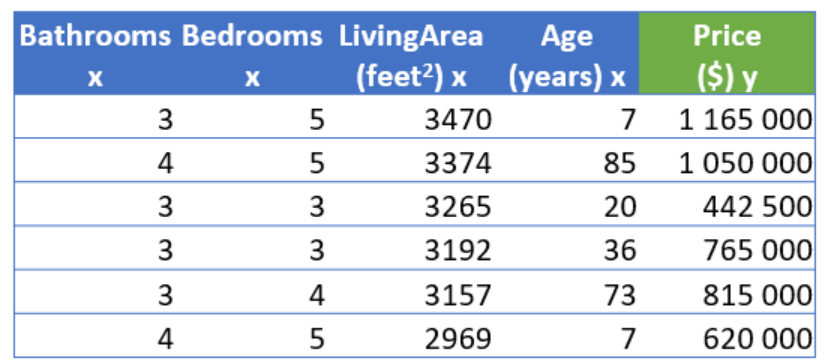

# Úkol

- Proveďte statistickou analýzu dat
- Vizualizujte data
- Vyberte vhodné proměnné pro lineární model
- Standardizujte data

## Čtení dat z CSV souboru

In [1]:
import pandas as pd 

In [2]:
data = pd.read_csv ("..\dataset\portland_filtered.csv",  sep=';')

## Základní charakteristiky data
- náhled dat
- zobrazení základních statistik (průměr, minimum, maximum, ...)
- kontrola NaN hodnot

## Distribuce dat
- grafy s distribucí dat
- boxplot grafy
- popsat, jaká jsou data (vychýlené hodnoty, ...)

## Vztahy mezi daty
- pairplot
- korelační tabulka
- Určit, které sloupce jsou lineárně závislé, vhodné pro vysvětlení price

## Standardizace dat

Každá funkce má jinou střední, standardní odchylku.

Standardizační centrum a funkce měřítka.

důvody:
* zabránit tomu, aby některé funkce modelu dominovaly
* může pomoci rychleji konvergovat modely strojového učení
* může usnadnit interpretaci koeficientů modelu strojového učení

Výpočet:
* x_new = (x – střední hodnota) / směrodatná_odchylka
* průměr = součet (x) / počet (x)
* směrodatná_odchylka = sqrt( součet ( (x – průměr)^2 ) / počet (x))

- proveďte standardizaci sloupců použitelných pro linární regresi
- zobrazte rozložení původních a standardizovaných dat

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [11]:
# Čtení dat z CSV souboru
data = pd.read_csv("../dataset/portland_filtered.csv", sep=';')

# Náhled dat
print("Náhled dat:")
print(data.head())

# Základní statistiky
print("\nZákladní statistiky:")
print(data.describe())

# Kontrola NaN hodnot
print("\nPočet chybějících hodnot v jednotlivých sloupcích:")
print(data.isna().sum())

Náhled dat:
   bathrooms  bedrooms  livingArea  age    price
0          3         5        3470    7  1165000
1          4         5        3374   85  1050000
2          3         3        3265   20   442500
3          3         3        3192   36   765000
4          3         4        3157   73   815000

Základní statistiky:
        bathrooms    bedrooms   livingArea        age         price
count  100.000000  100.000000   100.000000  100.00000  1.000000e+02
mean     2.380000    3.260000  1974.080000   49.88000  5.196074e+05
std      0.838228    0.860115   663.629851   32.77973  1.722241e+05
min      1.000000    1.000000   766.000000    3.00000  1.650000e+05
25%      2.000000    3.000000  1530.000000   20.00000  4.125000e+05
50%      2.000000    3.000000  1859.000000   47.50000  5.000000e+05
75%      3.000000    4.000000  2490.250000   75.25000  5.995312e+05
max      5.000000    6.000000  3470.000000  114.00000  1.165000e+06

Počet chybějících hodnot v jednotlivých sloupcích:
bathroom

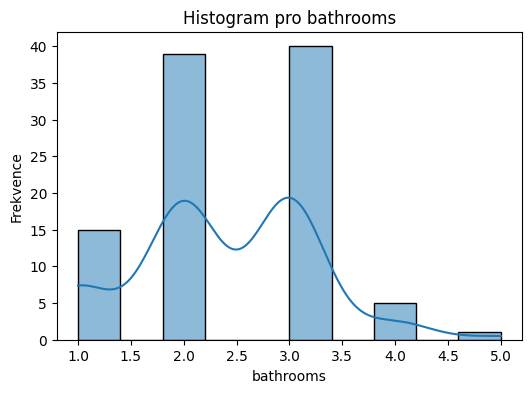

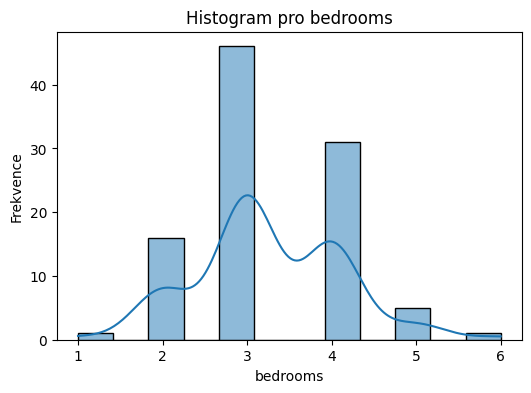

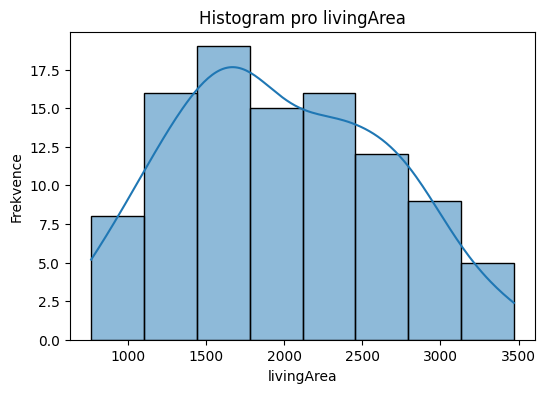

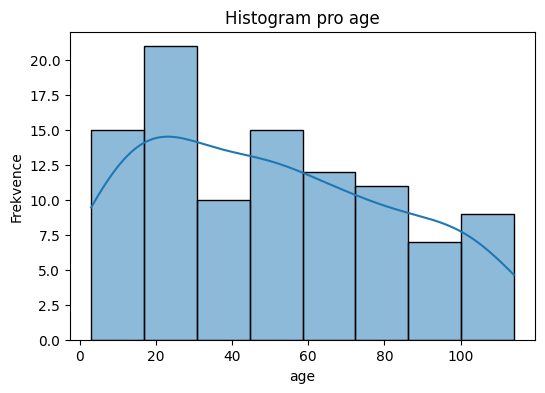

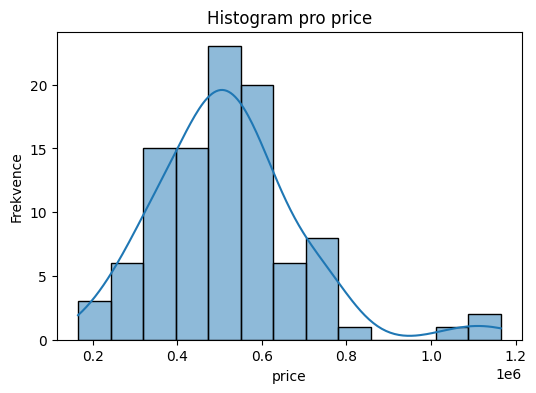

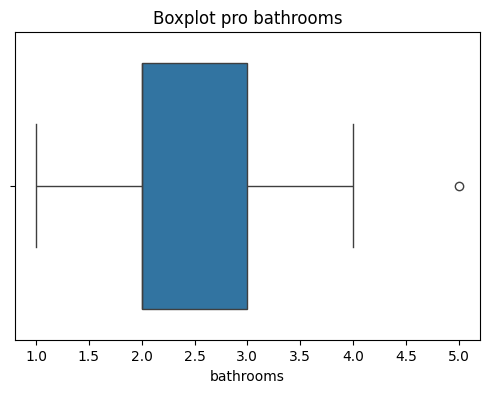

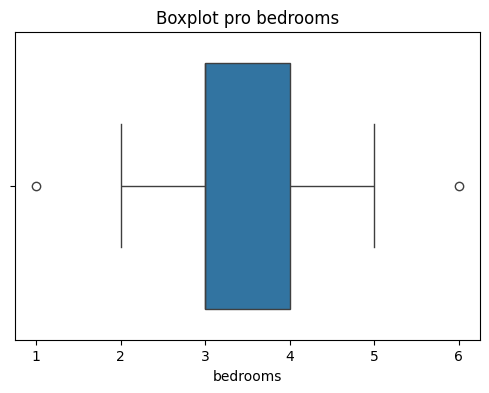

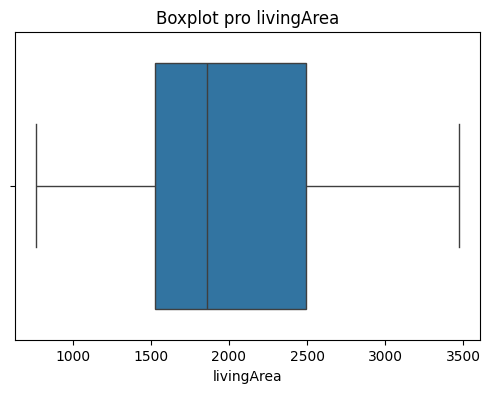

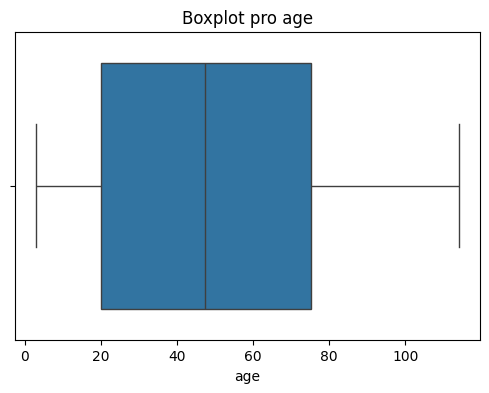

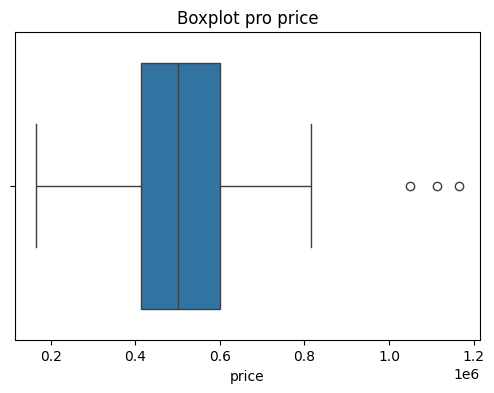

In [ ]:
#seznam numerických sloupců
num_columns = ['bathrooms', 'bedrooms', 'livingArea', 'age', 'price']

# Histogramy
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram pro {col}")
    plt.xlabel(col)
    plt.ylabel("Frekvence")
    plt.show()

# Boxploty
for col in num_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot pro {col}")
    plt.xlabel(col)
    plt.show()


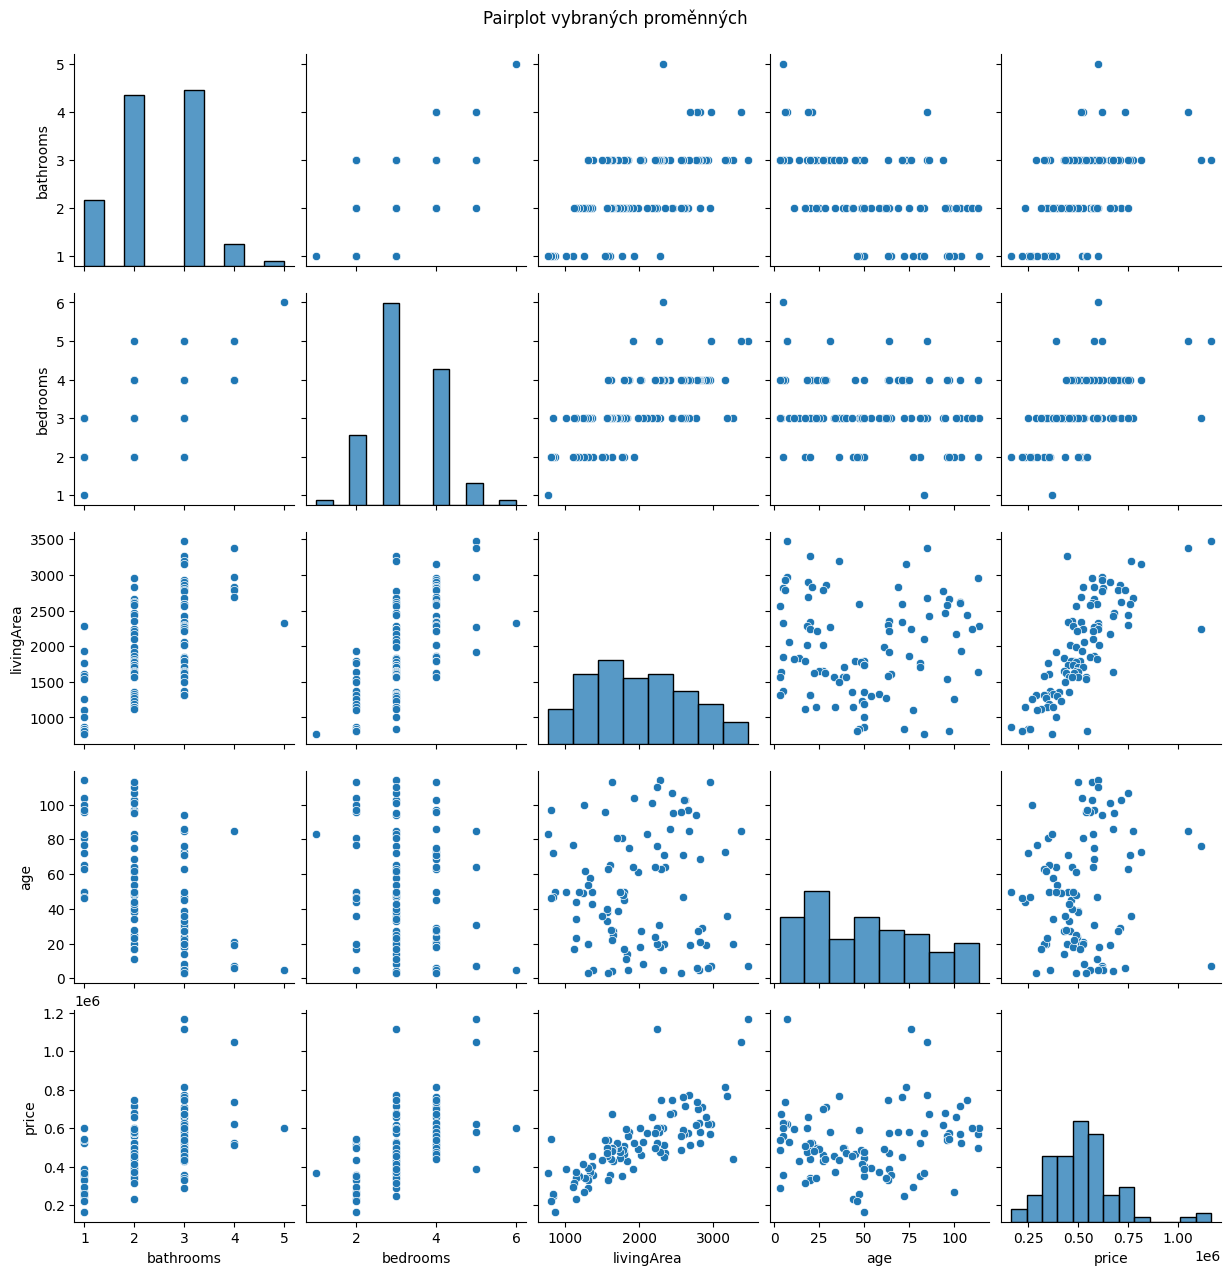

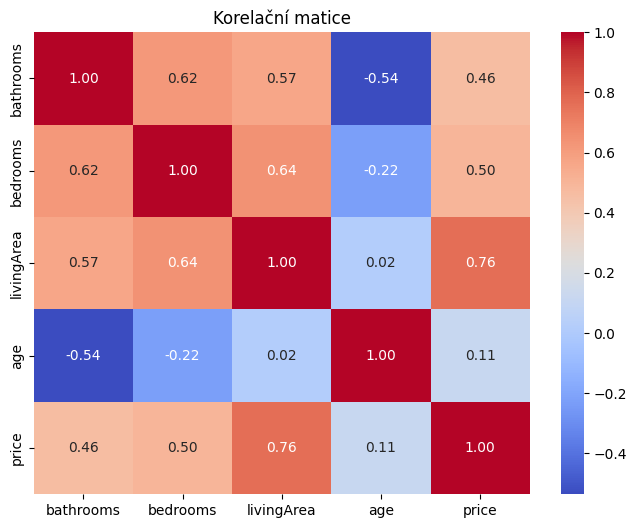

Vybrané proměnné pro lineární model (silná korelace s price): ['livingArea']


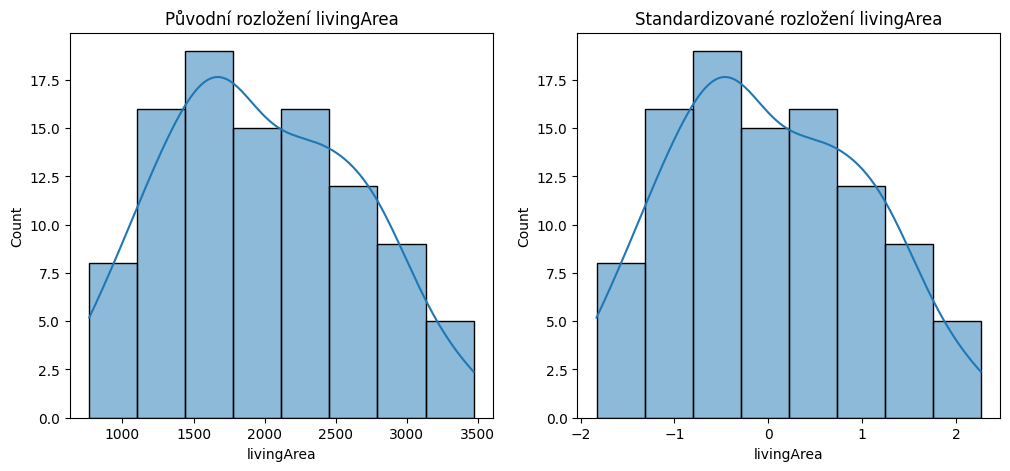

In [ ]:
# Pairplot – pokud máte více sloupců, můžete zvolit jen ty, které vás zajímají
sns.pairplot(data[num_columns])
plt.suptitle("Pairplot vybraných proměnných", y=1.02)
plt.show()

# Korelační matice
plt.figure(figsize=(8, 6))
corr_matrix = data[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Korelační matice")
plt.show()

# Na základě korelace můžeme vybrat proměnné, které silně korelují s 'price'
# Například vybereme všechny, kde absolutní hodnota korelace s 'price' > 0.5 (kromě samotné 'price')
corr_with_price = corr_matrix['price'].abs().sort_values(ascending=False)
selected_features = list(corr_with_price[corr_with_price > 0.5].index)
if 'price' in selected_features:
    selected_features.remove('price')

print("Vybrané proměnné pro lineární model (silná korelace s price):", selected_features)

# 4. Standardizace dat
# Standardizujeme vybrané proměnné
scaler = StandardScaler()
data_standardized = data.copy()
data_standardized[selected_features] = scaler.fit_transform(data[selected_features])

# Porovnání rozložení původních a standardizovaných dat pro první vybranou proměnnou
feature = selected_features[0]
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data[feature], kde=True)
plt.title(f"Původní rozložení {feature}")

plt.subplot(1, 2, 2)
sns.histplot(data_standardized[feature], kde=True)
plt.title(f"Standardizované rozložení {feature}")
plt.show()